# Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import sys

# Train and Validation Split

In [2]:
#Pass the percentage of data you need for test like 20 % 
def train_split(df,test_per):
    indices=df.index.tolist()
    test_size=round(len(df)*(test_per/100))
    random.seed(0)
    test_indices=random.sample(population=indices,k=test_size)
    valid_df=df.loc[test_indices]
    train_df=df.drop(test_indices)
    return train_df,valid_df

# Naive Bayes

In [3]:
def divide_by_label(train_df,label_col):
    div_labels={}
    length=len(train_df)
    for i in range(0,length):
        out=train_df.iloc[i][label_col]
        if(out not in div_labels):
            div_labels[out]=[]
        div_labels[out].append(train_df.iloc[i])
    return div_labels

In [4]:
def mean(list_nos):
    #print(list_nos)
    m=sum(list_nos)/len(list_nos)
    return m

In [5]:
def stand_deviation(list_nos):
    m=mean(list_nos)
    variance=0
    for no in list_nos:
        variance+=pow((no-m),2)
    variance/=len(list_nos)
    std_dev=math.sqrt(variance)
    return std_dev

In [6]:
def summarize(div_labels):
    summary={}
    for label,lis in div_labels.items():
        summary[label]=[(mean(attribute), stand_deviation(attribute)) for attribute in zip(*lis)]
    return summary  

In [7]:
def cal_prob(x, mean, std_dev):
    if(std_dev == 0.0):
        prob=0
    else:
        exp_part= math.exp(-(math.pow(x-mean,2)/(2*math.pow(std_dev,2))))
        prob=1/(math.sqrt(2*math.pi) * std_dev)*exp_part
    return prob

In [8]:
def cal_prob_class(summary,data):
    probabilities = {}
    for class_val, class_summary in summary.items():
        probabilities[class_val] = 1
        for i in range(len(class_summary)):
            mean, std_dev = class_summary[i]
            #print("Mean-",mean,"stddev-",std_dev)
            x = data[i]
            prob=cal_prob(x, mean, std_dev)
            if(prob != 0.0):
                probabilities[class_val] *= prob
            #print(probabilities)
    return probabilities

# Prediction

In [9]:
def predict(summary,data):
    probabilities = cal_prob_class(summary, data)
    #print("probs-",probabilities)
    ans_label,ans_prob = None, -1
    for class_val, probability in probabilities.items():
        if ans_label is None or probability > ans_prob:
            ans_prob = probability
            ans_label = class_val
    return ans_label  

In [10]:
def predict_all_accuracy(summary,valid_df,label_col):
    actual_list=[]
    predicted_list=[]
    
    correct=0
    for i in range(len(valid_df)):
        actual = valid_df.iloc[i][label_col]
        actual_list.append(actual)
        predicted = predict(summary, valid_df.iloc[i])
        predicted_list.append(predicted)
        #print("Actual-",actual,"Predicted-",predicted)
        if( actual == predicted ):
            correct+=1
        accuracy=(correct/len(valid_df))*100.0
    plot_graph(actual_list,predicted_list,"Graph")
    return accuracy

In [11]:
def plot_graph(actual_list,predicted_list,title):
    x_labels=[]
    for i in range(len(actual_list)):      #oddnumbers
        x_labels.append(i)
        
    area=np.pi
    plt.xlabel("Customers")
    plt.ylabel("Loan Accepted/Not")
    plt.title(title)

    plt.scatter(x_labels, predicted_list, s=area, c='blue', alpha=0.5)
    plt.scatter(x_labels, actual_list, s=area, c='red', alpha=0.5)

    plt.show()
    return

# Main

In [12]:
def main():
    csv_file="LoanDataset/data.csv"
    label_col=9
    
    df=pd.read_csv(csv_file , header=None)
    train_df,valid_df=train_split(df,20)

    div_labels=divide_by_label(train_df,label_col)
    #print(div_labels)
    
    summary=summarize(div_labels)
    #print(summary)
    
    accuracy=predict_all_accuracy(summary,valid_df,label_col)
    print("Accuracy-",accuracy)
    

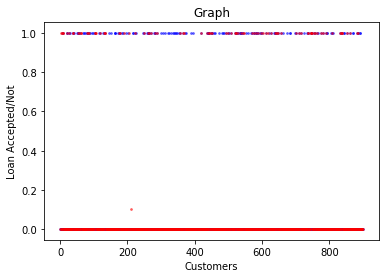

Accuracy- 86.8888888888889


In [13]:
if __name__ == "__main__":
    main()